In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
# This dataset contains information on how employees of a particular company are paid.

# The dataset contains the following information:

# Position Level: The level of the team members in that company. There are ten position levels in general.
# Salary: The salary of a team member. For different levels, there are significant differences in the salary. 
# Thus, we need to find a way to generalize the data.

In [3]:
X = dataset.iloc[:, 1:-1].values          # extracts features from the dataset
y = dataset.iloc[:, -1].values            # extracts the labels from the dataset

In [4]:
# to compare lets train first the linear regression model
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() 
lin_reg.fit(X, y) 

LinearRegression()

In [5]:
# now lets train the polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_regr = PolynomialFeatures(degree = 4)           # our polynomial model is of order
X_poly = poly_regr.fit_transform(X)                  # transforms the features to the polynomial form
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)                            # fits the linear regression object to the polynomial features

LinearRegression()

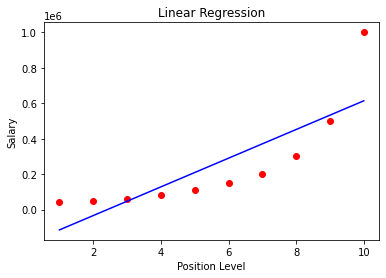

In [6]:
# now lets visualize the results
plt.scatter(X, y, color = 'red') 
plt.plot(X, lin_reg.predict(X), color = 'blue') # plotting the linear regression line
plt.title('Linear Regression')              
plt.xlabel('Position Level') 
plt.ylabel('Salary') 
plt.show()

In [9]:
# as we can see from the above plot the linear regression model does not fit the data well

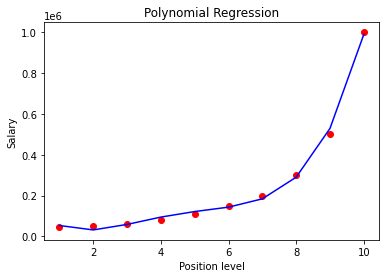

In [7]:
# now lets see polynomial regression model
plt.scatter(X, y, color = 'red') 
plt.plot(X, lin_reg_2.predict(poly_regr.fit_transform(X)), color = 'blue') # plotting the polynomial regression line
plt.title('Polynomial Regression')
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show() 

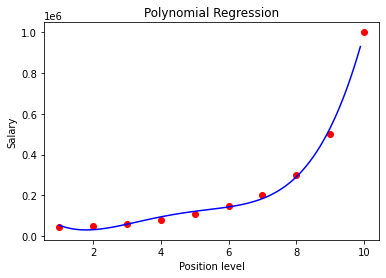

In [8]:
# lets get the graph more smootter
X_grid = np.arange(min(X), max(X), 0.1)        # choice of 0.1 instead of 0.01 to make the graph smoother
X_grid = X_grid.reshape((len(X_grid), 1))      # reshapes the array to be a matrix
plt.scatter(X, y, color = 'red') 
plt.plot(X_grid, lin_reg_2.predict(poly_regr.fit_transform(X_grid)), color = 'blue') 
plt.title('Polynomial Regression') 
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show()

In [9]:
# lets predict the results with linear and polynomial regression models
lin_reg.predict([[6.5]])

array([330378.78787879])

In [15]:
# The variable X=6.5 is exact between X=6 and X=7
# Thus we expect the model to predict a salary value between 150000 and 200000. 
# But With linear regression, this is not the case
# It overshoots the expected salary actually by almost two times. 
# This indicates that linear regression is not suitable for this problem

In [10]:
# polynomial regression model
lin_reg_2.predict(poly_regr.fit_transform([[6.5]]))

array([158862.45265153])

In [ ]:
# Executing the code above returns a predicted salary as 158862.45265155. 
# This value lies within the range of our expectations, and thus we can conclude the 
# polynomial regression is suitable for this problem